In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "cyclistic-bikeshare"

# Introduction

This work is a case study on the analysis of a fictional company named "Cyclistic bike-share". This case study is about understanding the usage behavior of casual riders and annual members for cyclistic bikes and how they differ from each other.
The insights from this analysis can be utilized to design a new marketing strategy to convert casual riders into annual members as the company’s future success depends on maximizing the number of annual memberships.

The dataset used in this case study has a different name because Cyclistic is a fictional company. For the purposes of this case study, the dataset is appropriate. The data has been made available by Motivate International Inc. under this [license](https://www.divvybikes.com/data-license-agreement).

The dataset can be downloaded from [here](https://divvy-tripdata.s3.amazonaws.com/index.html).

# Loading the cyclistic dataset

First step of data analysis Process

In [2]:
library(dplyr)
dataset <- read_csv("../input/cyclistic-bikeshare/Divvy_Trips_2020_Q1.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_character(),
  ended_at = col_character(),
  start_station_name = col_character(),
  start_station_id = col_double(),
  end_station_name = col_character(),
  end_station_id = col_double(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)




#### Viewing the structure of the dataset

This dataset contains 426,887 rows and 13 columns.

In [3]:
str(dataset)

spec_tbl_df [426,887 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:426887] "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ rideable_type     : chr [1:426887] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : chr [1:426887] "21-01-2020 20:06" "30-01-2020 14:22" "09-01-2020 19:29" "06-01-2020 16:17" ...
 $ ended_at          : chr [1:426887] "21-01-2020 20:14" "30-01-2020 14:26" "09-01-2020 19:32" "06-01-2020 16:25" ...
 $ start_station_name: chr [1:426887] "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : num [1:426887] 239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr [1:426887] "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : num [1:426887] 326 318 117 24 212 96 212 212 96 100 ...
 $ start_lat         : num 

In [4]:
View(dataset)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
EACB19130B0CDA4A,docked_bike,21-01-2020 20:06,21-01-2020 20:14,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member
8FED874C809DC021,docked_bike,30-01-2020 14:22,30-01-2020 14:26,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,member
789F3C21E472CA96,docked_bike,09-01-2020 19:29,09-01-2020 19:32,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,member
C9A388DAC6ABF313,docked_bike,06-01-2020 16:17,06-01-2020 16:25,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,member
943BC3CBECCFD662,docked_bike,30-01-2020 08:37,30-01-2020 08:42,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,member
6D9C8A6938165C11,docked_bike,10-01-2020 12:33,10-01-2020 12:37,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member
31EB9B8F406D4C82,docked_bike,10-01-2020 13:07,10-01-2020 13:12,Desplaines St & Randolph St,96,Wells St & Hubbard St,212,41.8846,-87.6446,41.8899,-87.6343,member
A2B24E3F9C9720E3,docked_bike,10-01-2020 07:24,10-01-2020 07:29,Desplaines St & Randolph St,96,Wells St & Hubbard St,212,41.8846,-87.6446,41.8899,-87.6343,member
5E3F01E1441730B7,docked_bike,31-01-2020 16:37,31-01-2020 16:42,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member


Let us have a look at the column names to get an idea of the dataset.

In [5]:
colnames(dataset)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

# Cleaning up the data to prepare for analysis

Converting data types of started_at and ended_at columns from string to date format.

In [6]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [7]:
datasetv1 <- dataset %>%
    mutate(started_at = dmy_hm(dataset$started_at), ended_at = dmy_hm(dataset$ended_at))

In [8]:
str(datasetv1)

spec_tbl_df [426,887 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:426887] "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ rideable_type     : chr [1:426887] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:426887], format: "2020-01-21 20:06:00" "2020-01-30 14:22:00" ...
 $ ended_at          : POSIXct[1:426887], format: "2020-01-21 20:14:00" "2020-01-30 14:26:00" ...
 $ start_station_name: chr [1:426887] "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : num [1:426887] 239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr [1:426887] "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : num [1:426887] 326 318 117 24 212 96 212 212 96 100 ...
 $ start_lat         : num [1:426887] 42 42 41.9 41.9 41.9 ...
 $ s

In [9]:
datasetv2 <- datasetv1 %>%
    mutate(ride_length = difftime(ended_at, started_at, units = 'secs'))

In [10]:
head(datasetv2)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>
EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:00,2020-01-21 20:14:00,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member,480 secs
8FED874C809DC021,docked_bike,2020-01-30 14:22:00,2020-01-30 14:26:00,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,member,240 secs
789F3C21E472CA96,docked_bike,2020-01-09 19:29:00,2020-01-09 19:32:00,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,member,180 secs
C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:00,2020-01-06 16:25:00,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,member,480 secs
943BC3CBECCFD662,docked_bike,2020-01-30 08:37:00,2020-01-30 08:42:00,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,member,300 secs
6D9C8A6938165C11,docked_bike,2020-01-10 12:33:00,2020-01-10 12:37:00,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member,240 secs


Adding a column showing the day of the week for each row in the table using the weekdays function.

In [11]:
datasetv2 <- datasetv2 %>%
    mutate(day_of_week = weekdays(started_at))

In [12]:
head(datasetv2)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>
EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:00,2020-01-21 20:14:00,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member,480 secs,Tuesday
8FED874C809DC021,docked_bike,2020-01-30 14:22:00,2020-01-30 14:26:00,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,member,240 secs,Thursday
789F3C21E472CA96,docked_bike,2020-01-09 19:29:00,2020-01-09 19:32:00,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,member,180 secs,Thursday
C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:00,2020-01-06 16:25:00,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,member,480 secs,Monday
943BC3CBECCFD662,docked_bike,2020-01-30 08:37:00,2020-01-30 08:42:00,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,member,300 secs,Thursday
6D9C8A6938165C11,docked_bike,2020-01-10 12:33:00,2020-01-10 12:37:00,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member,240 secs,Friday


Removing lat and long fields as we are not going to use these fields for analysis.

In [13]:
dataset_v3 <- datasetv2 %>%
    select(-c(start_lat, start_lng, end_lat, end_lng))


Inspecting the new table that has been created.

In [14]:
colnames(dataset_v3)  #List of column names


[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "member_casual"     
[10] "ride_length"        "day_of_week"

In [15]:
nrow(dataset_v3)  #How many rows are in data frame?


[1] 426887

In [16]:
dim(dataset_v3)  #Dimensions of the data frame?


[1] 426887     11

In [17]:
head(dataset_v3)  #See the first 6 rows of data frame.  Also tail(qs_raw)


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,day_of_week
<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<drtn>,<chr>
EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:00,2020-01-21 20:14:00,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,member,480 secs,Tuesday
8FED874C809DC021,docked_bike,2020-01-30 14:22:00,2020-01-30 14:26:00,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,member,240 secs,Thursday
789F3C21E472CA96,docked_bike,2020-01-09 19:29:00,2020-01-09 19:32:00,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,member,180 secs,Thursday
C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:00,2020-01-06 16:25:00,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,member,480 secs,Monday
943BC3CBECCFD662,docked_bike,2020-01-30 08:37:00,2020-01-30 08:42:00,Clinton St & Lake St,66,Wells St & Hubbard St,212,member,300 secs,Thursday
6D9C8A6938165C11,docked_bike,2020-01-10 12:33:00,2020-01-10 12:37:00,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,member,240 secs,Friday


In [18]:
str(dataset_v3)  #See list of columns and data types (numeric, character, etc)


tibble [426,887 × 11] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:426887] "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ rideable_type     : chr [1:426887] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:426887], format: "2020-01-21 20:06:00" "2020-01-30 14:22:00" ...
 $ ended_at          : POSIXct[1:426887], format: "2020-01-21 20:14:00" "2020-01-30 14:26:00" ...
 $ start_station_name: chr [1:426887] "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : num [1:426887] 239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr [1:426887] "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : num [1:426887] 326 318 117 24 212 96 212 212 96 100 ...
 $ member_casual     : chr [1:426887] "member" "member" "member" "member" ...
 $ rid

In [19]:
summary(dataset_v3)  #Statistical summary of data. Mainly for numerics

   ride_id          rideable_type        started_at                 
 Length:426887      Length:426887      Min.   :2020-01-01 00:04:00  
 Class :character   Class :character   1st Qu.:2020-01-24 14:03:00  
 Mode  :character   Mode  :character   Median :2020-02-17 05:01:00  
                                       Mean   :2020-02-14 01:22:49  
                                       3rd Qu.:2020-03-05 15:08:00  
                                       Max.   :2020-03-31 23:51:00  
                                                                    
    ended_at                   start_station_name start_station_id
 Min.   :2020-01-01 00:10:00   Length:426887      Min.   :  2.0   
 1st Qu.:2020-01-24 14:21:00   Class :character   1st Qu.: 77.0   
 Median :2020-02-17 05:48:00   Mode  :character   Median :176.0   
 Mean   :2020-02-14 01:44:55                      Mean   :209.8   
 3rd Qu.:2020-03-05 15:27:00                      3rd Qu.:298.0   
 Max.   :2020-05-19 20:10:00                  

Converting ride_length column from factor to numerics so that we can perform calculation on the data.

In [20]:
is.factor(dataset_v3$ride_length)
dataset_v3$ride_length <- as.numeric(as.character(dataset_v3$ride_length))
is.numeric(dataset_v3$ride_length)


[1] FALSE

[1] TRUE

Removing the rows that contain ride_length that have negative values and creating a new version of the dataframe.

In [21]:
dataset_v4 <- dataset_v3[!(dataset_v3$start_station_name == "HQ QR" | dataset_v3$ride_length<0),]

# Conducting descriptive analysis

Descriptive analysis on ride_length (all figures in seconds)

In [22]:
mean(dataset_v4$ride_length)                                 #straight average (total ride length / rides)
median(dataset_v4$ride_length)                               #midpoint number in the ascending array of ride lengths
max(dataset_v4$ride_length)                                  #longest ride
min(dataset_v4$ride_length)                                  #shortest ride
sd(dataset_v4$ride_length)                                   #standard deviation

[1] 1338.603

[1] 540

[1] 9387000

[1] 0

[1] 37307.22

condensing the four lines above to one line using summary() on the specific attribute

In [23]:
summary(dataset_v4$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     360     540    1339     960 9387000 

Comparing members and casual users

In [24]:
aggregate(dataset_v4$ride_length ~ dataset_v4$member_casual, FUN = mean)
aggregate(dataset_v4$ride_length ~ dataset_v4$member_casual, FUN = median)
aggregate(dataset_v4$ride_length ~ dataset_v4$member_casual, FUN = max)
aggregate(dataset_v4$ride_length ~ dataset_v4$member_casual, FUN = min)
aggregate(dataset_v4$ride_length ~ dataset_v4$member_casual, FUN = sd)

dataset_v4$member_casual,dataset_v4$ride_length
<chr>,<dbl>
casual,6230.7116
member,760.5309


dataset_v4$member_casual,dataset_v4$ride_length
<chr>,<dbl>
casual,1380
member,540


dataset_v4$member_casual,dataset_v4$ride_length
<chr>,<dbl>
casual,9387000
member,5627640


dataset_v4$member_casual,dataset_v4$ride_length
<chr>,<dbl>
casual,0
member,0


dataset_v4$member_casual,dataset_v4$ride_length
<chr>,<dbl>
casual,107435.20
member,13757.55


Aggregating the average ride time by each day for members vs casual users

In [25]:
aggregate(dataset_v4$ride_length ~ dataset_v4$member_casual + dataset_v4$day_of_week, FUN = mean)

dataset_v4$member_casual,dataset_v4$day_of_week,dataset_v4$ride_length
<chr>,<chr>,<dbl>
casual,Friday,7907.7232
member,Friday,757.1129
casual,Monday,5818.3779
member,Monday,778.4642
casual,Saturday,6017.1257
member,Saturday,930.0040
casual,Sunday,5710.5764
member,Sunday,949.1458
casual,Thursday,8744.6842


From the above table, it can be seen that the days of the week are out of order. 
Let's fix that.

In [26]:
dataset_v4$day_of_week <- ordered(dataset_v4$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

Now, let's run the average ride time by each day for members vs casual users

In [27]:
aggregate(dataset_v4$ride_length ~ dataset_v4$member_casual + dataset_v4$day_of_week, FUN = mean)

dataset_v4$member_casual,dataset_v4$day_of_week,dataset_v4$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,5710.5764
member,Sunday,949.1458
casual,Monday,5818.3779
member,Monday,778.4642
casual,Tuesday,5832.1362
member,Tuesday,691.9994
casual,Wednesday,5132.4053
member,Wednesday,699.4829
casual,Thursday,8744.6842


Analyzing the ridership data by type and weekday

In [28]:
dataset_v4 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%              #creates  a new column weekday using wday() function
  group_by(member_casual, weekday) %>%                              #groups the dataframe basaed on usertype and weekday
  summarise(number_of_rides = n()                                   #calculates the number of rides and average duration 
            ,average_duration = mean(ride_length)) %>%              #calculates the average duration
  arrange(member_casual, weekday)                                   #sorts the dataframe based on member_casual and weekday columns

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,14886,5710.5764
casual,Mon,3699,5818.3779
casual,Tue,4583,5832.1362
casual,Wed,5201,5132.4053
casual,Thu,4227,8744.6842
casual,Fri,4638,7907.7232
casual,Sat,7480,6017.1257
member,Sun,35964,949.1458
member,Mon,61923,778.4642


# Visualization
Let's visualize the number of rides by rider type

In [29]:
options(repr.plot.width = 14, repr.plot.height = 8)           # for adjusting the plot size

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



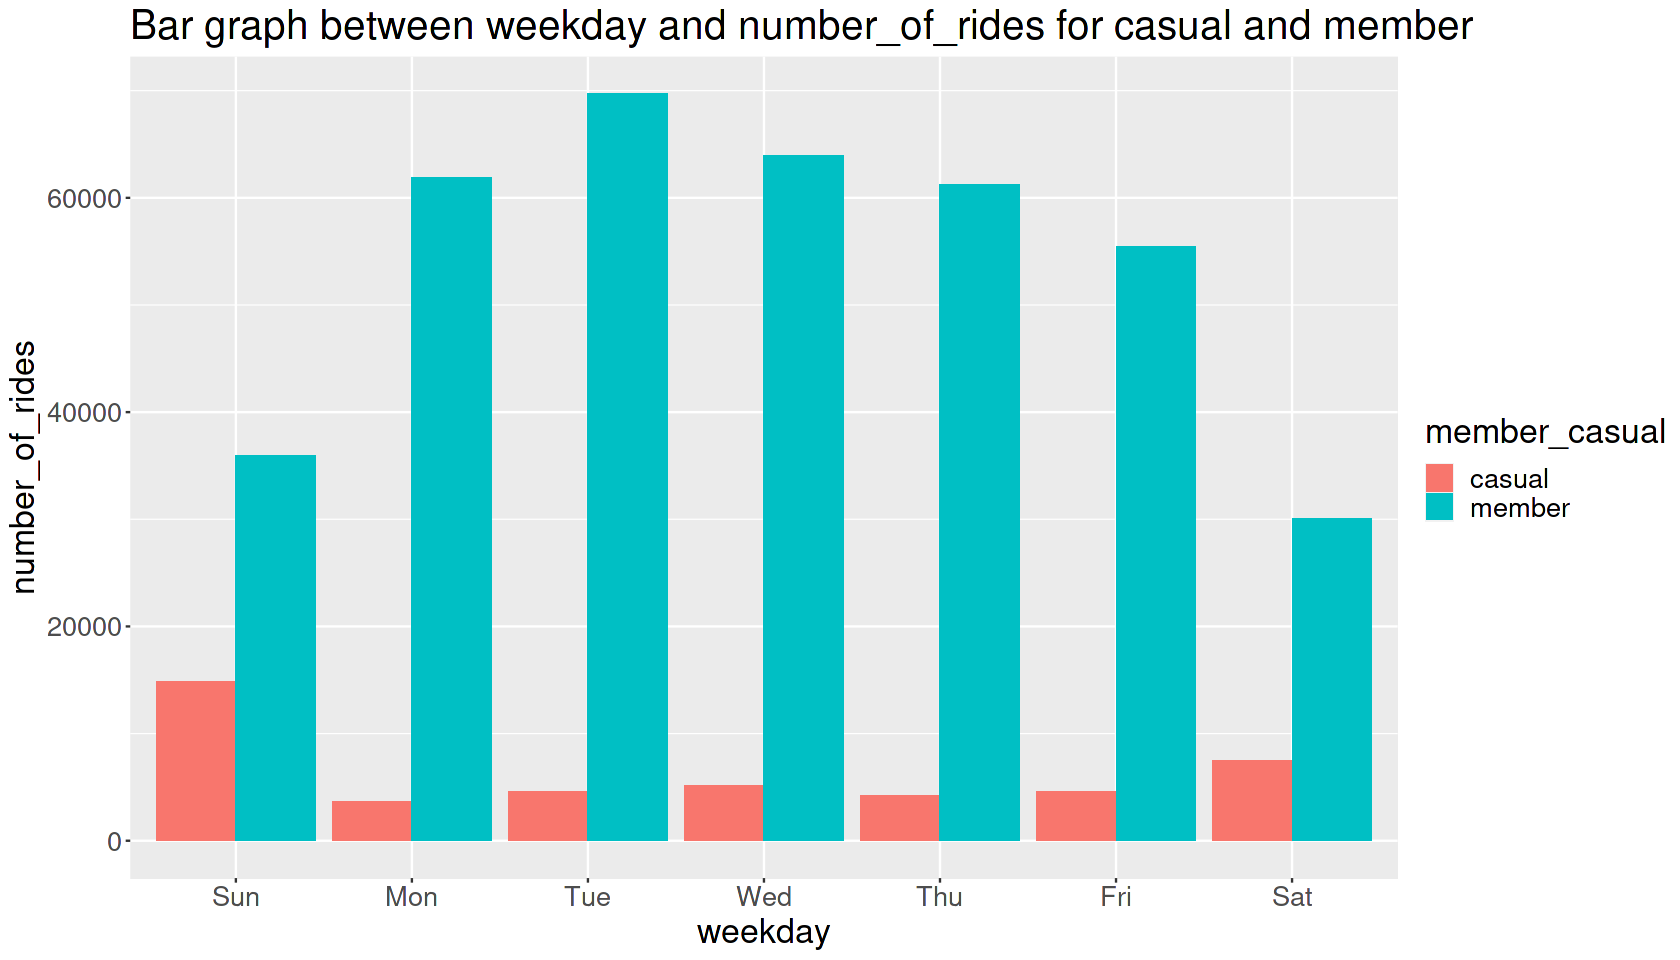

In [30]:
dataset_v4 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Bar graph between weekday and number_of_rides for casual and member") +
  theme(text = element_text(size = 20))
  

From the above graph it can be deduced that, casual riders are mostly active during weekdays i.e. Monday to Friday.
Whereas on weekends (saturday and sunday), they are comparatively less active. A priliminary hypothesis can be made that, casual members mostly consists of working class people whose prime objective is to ride between work places and they find the cyclistic bikes convenient.

As for the members, the graph shows an almost constant behavior during weekdays but some rise during weekends. This could be because the members have more non working class people like- children, old people etc.

Let's create a visualization for average duration

In [31]:
options(repr.plot.width = 14, repr.plot.height = 8)

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



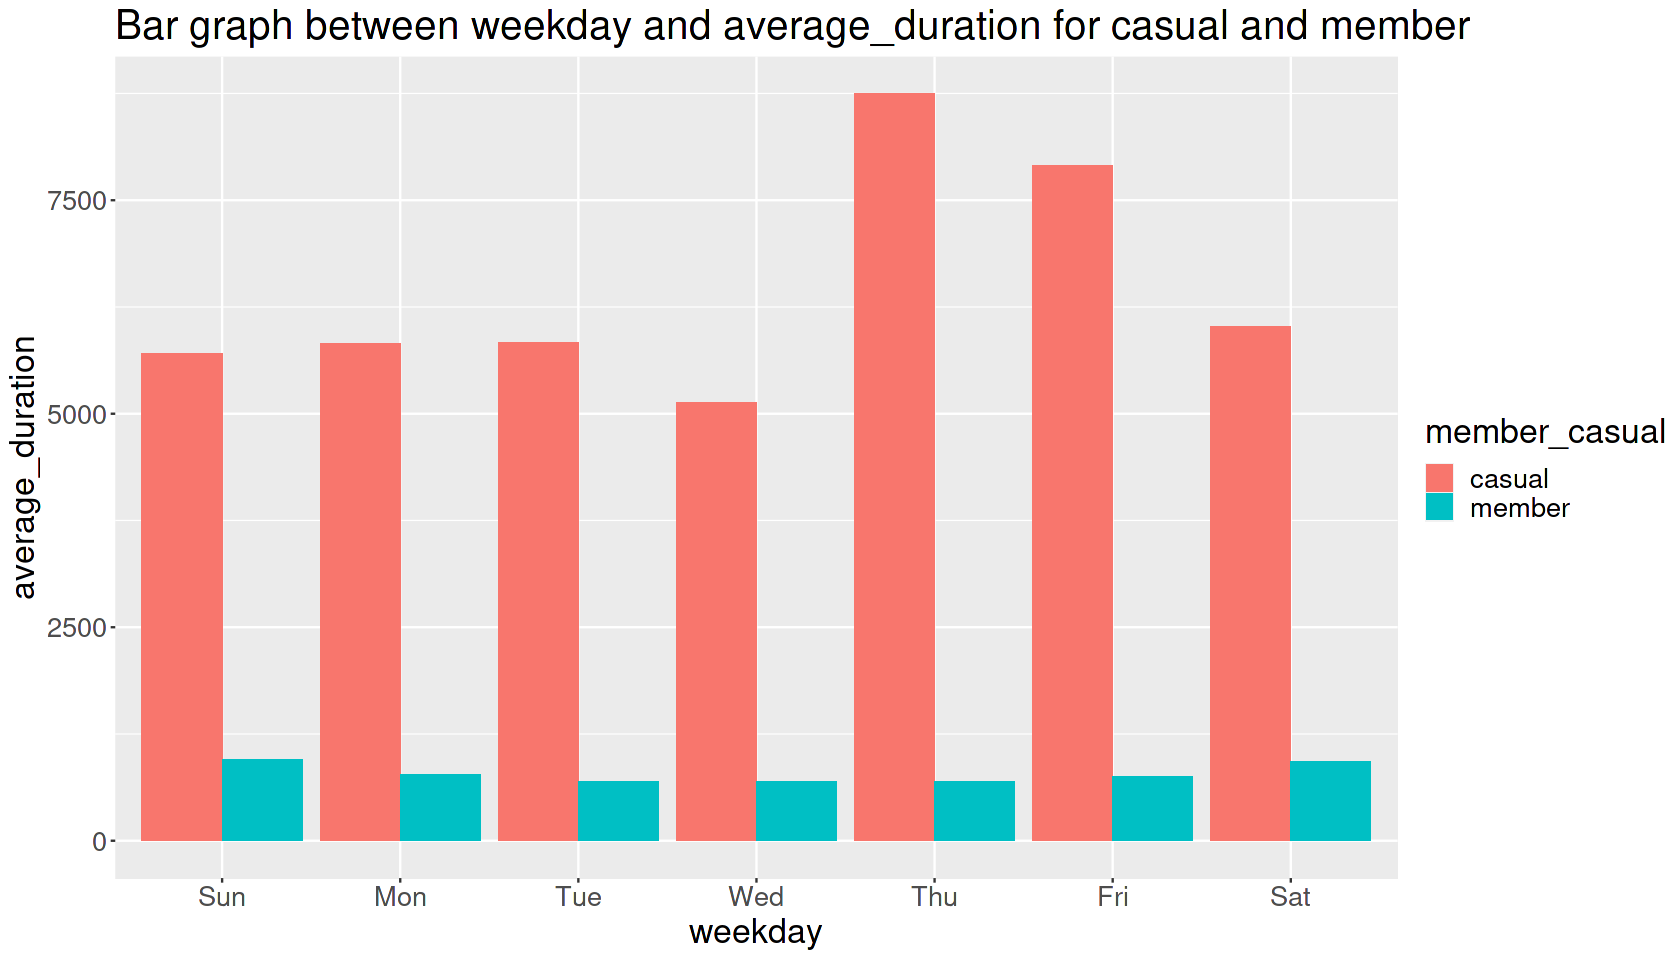

In [32]:
dataset_v4 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Bar graph between weekday and average_duration for casual and member") +
  theme(text = element_text(size = 20))

## Key Findings:

How do annual members and casual riders use Cyclistic bikes differently?

* Annual members are less active during weekdays but more active during weekends.
* Casual members are more active during weekdays but less active during weekends.

